In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier 
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.metrics import make_scorer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as IPipeline
from xgboost import XGBClassifier
import pickle

In [2]:
train_multi = pd.read_parquet('../data/cleaned/train_multi.parquet')
X_train_multi = train_multi.drop('classification', axis = 1)
y_train_multi = train_multi.classification
test_multi = pd.read_parquet('../data/cleaned/test_multi.parquet')
X_test_multi = test_multi.drop('classification', axis = 1)
y_test_multi = test_multi.classification

In [3]:
train_binary = pd.read_parquet('../data/cleaned/train_binary.parquet')
X_train_binary = train_binary.drop('disposition', axis = 1)
y_train_binary = train_binary.disposition
test_binary = pd.read_parquet('../data/cleaned/test_binary.parquet')
X_test_binary = test_binary.drop('disposition', axis = 1)
y_test_binary = test_binary.disposition

In [4]:
y_train_multi.value_counts()

0    1942
2     814
3     299
1     282
4      71
Name: classification, dtype: int64

In [5]:
y_train_binary.value_counts()

1    2350
0    1942
Name: disposition, dtype: int64

In [6]:
X_train_multi

,ml_fittype,num_of_objects_around_star,right_ascension,declination,g_band_mag,r_band_mag,i_band_mag,z_band_mag,j_band_mag,h_band_mag,...,star_density,abs_gr_diff,abs_gi_diff,abs_gz_diff,abs_ri_diff,abs_rz_diff,abs_iz_diff,abs_jh_diff,abs_jk_diff,abs_hk_diff
3421,LS+MCMC,1,296.88577,40.228230,13.841,13.466,13.354,13.304,12.519,12.263,...,0.91814,0.375,0.487,0.537,0.112,0.162,0.050,0.256,0.311,0.055
1504,LS+MCMC,1,293.14447,46.666241,15.790,15.300,15.188,15.110,14.268,13.967,...,3.37561,0.490,0.602,0.680,0.112,0.190,0.078,0.301,0.365,0.064
1052,LS+MCMC,1,298.39490,40.628910,14.536,14.017,13.861,13.785,12.869,12.558,...,0.97896,0.519,0.675,0.751,0.156,0.232,0.076,0.311,0.333,0.022
8050,LS+MCMC,1,295.61349,46.190689,14.184,13.746,13.617,13.594,12.746,12.501,...,20.19752,0.438,0.567,0.590,0.129,0.152,0.023,0.245,0.342,0.097
2920,LS+MCMC,2,297.27798,48.320332,13.328,12.789,12.642,12.578,11.680,11.399,...,0.73328,0.539,0.686,0.750,0.147,0.211,0.064,0.281,0.360,0.079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,LS+MCMC,1,285.66165,37.964500,13.424,12.843,12.675,12.618,11.672,11.316,...,1.62021,0.581,0.749,0.806,0.168,0.225,0.057,0.356,0.419,0.063
9357,LS+MCMC,1,298.23053,48.794109,13.036,12.703,12.634,12.648,11.771,11.595,...,0.92108,0.333,0.402,0.388,0.069,0.055,0.014,0.176,0.234,0.058
9368,LS+MCMC,1,296.98615,40.675110,14.153,13.744,13.653,13.617,12.711,12.463,...,114.73195,0.409,0.500,0.536,0.091,0.127,0.036,0.248,0.301,0.053
2767,LS+MCMC,1,285.15692,47.873329,16.447,15.654,15.443,15.375,14.390,13.972,...,5.77265,0.793,1.004,1.072,0.211,0.279,0.068,0.418,0.439,0.021


In [7]:
ohe = OneHotEncoder(sparse = False)
transformer = ColumnTransformer([('ohe', ohe, ['ml_fittype'])], remainder = 'passthrough')
X_train_multi_ohe = transformer.fit_transform(X_train_multi)
pd.DataFrame(X_train_multi_ohe, index = X_train_multi.index)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
3421,0.0,1.0,1.0,296.88577,40.228230,13.841,13.466,13.354,13.304,12.519,...,0.91814,0.375,0.487,0.537,0.112,0.162,0.050,0.256,0.311,0.055
1504,0.0,1.0,1.0,293.14447,46.666241,15.790,15.300,15.188,15.110,14.268,...,3.37561,0.490,0.602,0.680,0.112,0.190,0.078,0.301,0.365,0.064
1052,0.0,1.0,1.0,298.39490,40.628910,14.536,14.017,13.861,13.785,12.869,...,0.97896,0.519,0.675,0.751,0.156,0.232,0.076,0.311,0.333,0.022
8050,0.0,1.0,1.0,295.61349,46.190689,14.184,13.746,13.617,13.594,12.746,...,20.19752,0.438,0.567,0.590,0.129,0.152,0.023,0.245,0.342,0.097
2920,0.0,1.0,2.0,297.27798,48.320332,13.328,12.789,12.642,12.578,11.680,...,0.73328,0.539,0.686,0.750,0.147,0.211,0.064,0.281,0.360,0.079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,0.0,1.0,1.0,285.66165,37.964500,13.424,12.843,12.675,12.618,11.672,...,1.62021,0.581,0.749,0.806,0.168,0.225,0.057,0.356,0.419,0.063
9357,0.0,1.0,1.0,298.23053,48.794109,13.036,12.703,12.634,12.648,11.771,...,0.92108,0.333,0.402,0.388,0.069,0.055,0.014,0.176,0.234,0.058
9368,0.0,1.0,1.0,296.98615,40.675110,14.153,13.744,13.653,13.617,12.711,...,114.73195,0.409,0.500,0.536,0.091,0.127,0.036,0.248,0.301,0.053
2767,0.0,1.0,1.0,285.15692,47.873329,16.447,15.654,15.443,15.375,14.390,...,5.77265,0.793,1.004,1.072,0.211,0.279,0.068,0.418,0.439,0.021


In [8]:
full_column_labels = ['ml_fittype_LS', 'ml_fittype_LS_MCMC'] + X_train_multi.columns.values.tolist()[1:]

In [95]:
samplers = [(SMOTE(random_state = 42)),
            (RandomOverSampler(random_state = 42)),
            None]

In [50]:
def run_model(X_train, X_test, y_train, y_test, estimator = None,
              resampling = None, grid_search = False, grid_params = None, cv = None,
              scoring = None, plot_confusion = True):
    
    numeric_col = X_train.select_dtypes('number').columns.values.tolist()
    object_col = X_train.select_dtypes('object').columns.values.tolist()
    steps_no_resampling = [('ssc', StandardScaler(), numeric_col), ('ohe', OneHotEncoder(), object_col)]
    preprocess_no_resampling = ColumnTransformer(steps_no_resampling)
    
    steps = [('preprocess', preprocess_no_resampling), ('rsm', resampling), ('clf', estimator)]
    pipe = IPipeline(steps = steps)
    
    if grid_search:
        model = GridSearchCV(pipe, param_grid = grid_params, cv = cv, scoring = scoring)
    else:
        model = pipe
    
    model.fit(X_train, y_train)
    
    if plot_confusion:
        ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test))).plot();
        
    return model

In [96]:
def class_k_recall(y, y_pred, k = 0):
    pairs = list(zip(y, y_pred))
    num_of_variables = len(list(set(y)))
    tp = pairs.count((k, k))
    fn = 0
    
    for i in range(num_of_variables):
        if i == k:
            continue
        fn += pairs.count((k,i))
    
    return tp / (fn + tp)

In [97]:
def class_k_precision(y, y_pred, k = 0):
    pairs = list(zip(y, y_pred))
    num_of_variables = len(list(set(y)))
    tp = pairs.count((k, k))
    fp = 0
    
    for i in range(num_of_variables):
        if i == k:
            continue
        fp += pairs.count((i, k))
        
    return tp / (tp + fp)

In [98]:
def class_k_f1(y, y_pred, k = 0):
    recall = class_k_recall(y, y_pred, k)
    precision = class_k_precision(y, y_pred, k)
    
    return 2 * recall * precision / (recall + precision)

# Binary Class Models

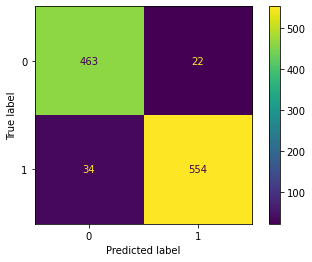

In [99]:
base_logistic_pipe = run_model(X_train_binary, X_test_binary, y_train_binary, y_test_binary,
                               estimator = LogisticRegression(random_state = 42, max_iter = 1000),
                               plot_confusion = True)

In [100]:
with open('../data/models/binary_base_logistic.pickle', 'wb') as f:
    pickle.dump(base_logistic_pipe, f)

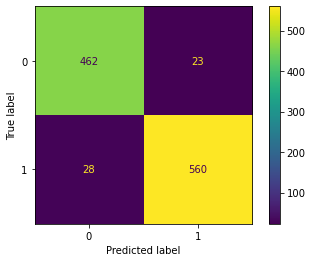

In [102]:
params = [
    {
        'clf': (LogisticRegression(random_state = 42, max_iter = 5000),),
        'clf__C': [1e-4, 1e-3, 1e-2, 1, 1e2, 1e3, 1e4],
    }
]

logistic = run_model(X_train_binary, X_test_binary, y_train_binary, y_test_binary,
                     grid_search = True, grid_params = params, estimator = LogisticRegression(),
                     plot_confusion = True)

In [103]:
with open('../data/models/binary_logistic.pickle', 'wb') as f:
    pickle.dump(logistic, f)

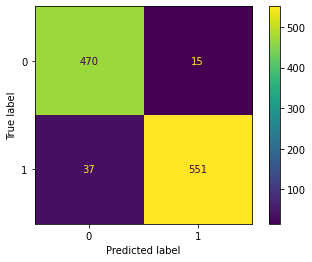

In [107]:
params = [
    {
        'clf': (DecisionTreeClassifier(random_state = 42),),
        'clf__max_depth': [5, 7, 9, 11, 13],
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_features': ['sqrt', None]
    }
]

tree = run_model(X_train_binary, X_test_binary, y_train_binary, y_test_binary,
                 grid_search = True, grid_params = params, estimator = DecisionTreeClassifier(),
                 plot_confusion = True)

In [108]:
with open('../data/models/binary_tree.pickle', 'wb') as f:
    pickle.dump(tree, f)

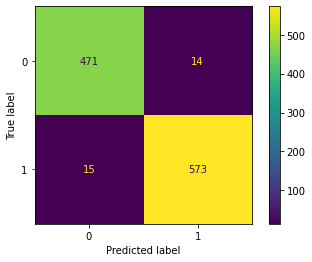

In [111]:
params = [
    {
        'clf': (RandomForestClassifier(random_state = 42),),
        'clf__n_estimators': [100, 300],
        'clf__max_depth': [5, 7, 9]
#         'rsm': samplers
    }
]

random_forest = run_model(X_train_binary, X_test_binary, y_train_binary, y_test_binary,
                          estimator = RandomForestClassifier(),
                          grid_search = True, grid_params = params, scoring = None,
                          cv = 5, plot_confusion = True)

In [112]:
with open('../data/models/binary_random_forest.pickle', 'wb') as f:
    pickle.dump(random_forest, f)

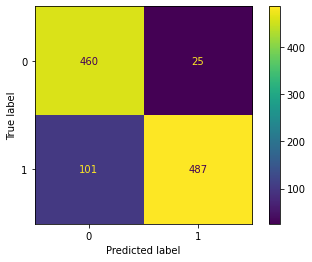

In [94]:
params = [
    {
        'clf': (KNeighborsClassifier(),),
        'clf__n_neighbors': [3, 5, 7, 9, 11, 13],
        'rsm': samplers
    }
]

kneighbors = run_model(X_train_binary, X_test_binary, y_train_binary, y_test_binary,
                       estimator = KNeighborsClassifier(),
                       grid_search = True, grid_params = params,
                       cv = 5, plot_confusion = True)

In [113]:
with open('../data/models/binary_kneighbors.pickle', 'wb') as f:
    pickle.dump(kneighbors, f)

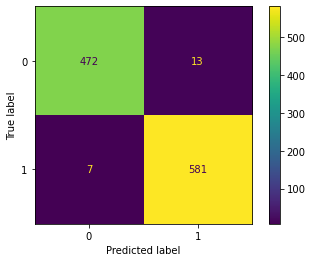

In [72]:
params = [
    {
        'clf': (AdaBoostClassifier(random_state = 42),),
        'clf__base_estimator': [DecisionTreeClassifier(random_state = 42, max_depth = 1),
                           DecisionTreeClassifier(random_state = 42, max_depth = 2)],
        'clf__n_estimators': [100, 200, 300, 400, 500],
        'clf__learning_rate': [0.1, 1],
#         'rsm': samplers
    }
]

adaboost = run_model(X_train_binary, X_test_binary, y_train_binary, y_test_binary,
                     estimator = AdaBoostClassifier(),
                     grid_search = True, grid_params = params,
                     cv = 5, plot_confusion = True)

In [82]:
with open('../data/models/binary_adaboost.pickle', 'wb') as f:
    pickle.dump(adaboost, f)

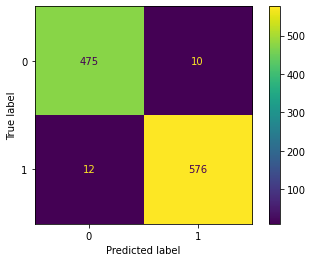

In [81]:
params = [
    {
        'clf': (GradientBoostingClassifier(random_state = 42),),
        'clf__n_estimators': [100, 500, 1000],
        'clf__max_features': [None, 'sqrt'],
        'clf__max_depth': [2, 3]
#         'rsm': samplers
    }
]

gradientboost = run_model(X_train_binary, X_test_binary, y_train_binary, y_test_binary,
                     estimator = GradientBoostingClassifier(),
                     grid_search = True, grid_params = params,
                     cv = 5, plot_confusion = True)

In [83]:
with open('../data/models/binary_gradientboost.pickle', 'wb') as f:
    pickle.dump(gradientboost, f)

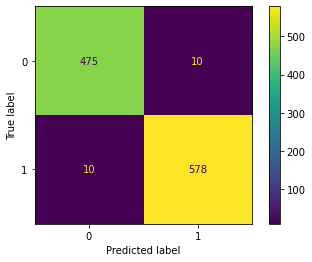

In [91]:
params = [
    {
        'clf': (XGBClassifier(random_state = 42),),
        'clf__n_estimators': [100, 500, 1000],
        'clf__max_depth': [6, 9, 12],
#         'rsm': samplers
    }
]

xgboost = run_model(X_train_binary, X_test_binary, y_train_binary, y_test_binary,
                     estimator = XGBClassifier(), grid_search = True, grid_params = params,
                     cv = 5, plot_confusion = True)

In [93]:
with open('../data/models/binary_xgboost.pickle', 'wb') as f:
    pickle.dump(xgboost, f)

# Multiclass Models

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       495
           1       0.63      0.59      0.61        66
           2       0.88      0.85      0.86       194
           3       0.77      0.76      0.76        78
           4       0.31      0.47      0.38        19

    accuracy                           0.87       852
   macro avg       0.71      0.72      0.71       852
weighted avg       0.88      0.87      0.88       852



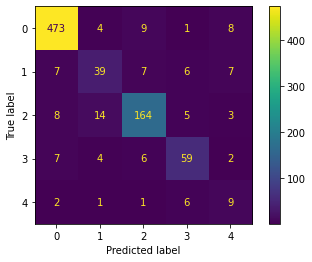

In [15]:
base_decision_tree = run_model(X_train_multi, X_test_multi, y_train_multi, y_test_multi,
                               ('logreg', DecisionTreeClassifier(random_state = 42)),
                               plot_confusion = True)
print(classification_report(y_test_multi, base_decision_tree.predict(X_test_multi)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       495
           1       0.63      0.59      0.61        66
           2       0.88      0.85      0.86       194
           3       0.77      0.76      0.76        78
           4       0.31      0.47      0.38        19

    accuracy                           0.87       852
   macro avg       0.71      0.72      0.71       852
weighted avg       0.88      0.87      0.88       852



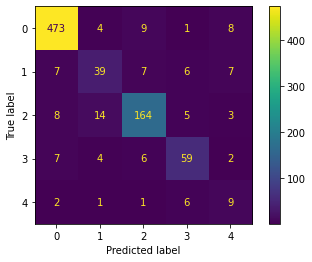

In [51]:
base_decision_tree = Pipeline([('preprocess', preprocess_no_SMOTE),
                               ('tree', DecisionTreeClassifier(random_state = 42))])

base_decision_tree.fit(X_train_multi, y_train_multi)
base_decision_tree.score(X_test_multi, y_test_multi)
print(classification_report(y_test_multi, base_decision_tree.predict(X_test_multi)))
ConfusionMatrixDisplay(confusion_matrix(y_test_multi, base_decision_tree.predict(X_test_multi))).plot();